In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import (
    SelectKBest,
    RFE,
    f_regression,
    SequentialFeatureSelector,
)
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    RobustScaler,
    PolynomialFeatures,
)
import matplotlib as mpl
import wrangle as w
import warnings

from env import user, password, host
import os

warnings.filterwarnings("ignore")

mpl.rcParams["axes.formatter.useoffset"] = False
mpl.rcParams["axes.formatter.limits"] = (-1_000_000, 1_000_000)

In [2]:
# def get_zillow(user=user, password=password, host=host):
#     """
#     This function acquires data from a SQL database of 2017 Zillow properties and caches it locally.

#     :param user: The username for accessing the MySQL database
#     :param password: The password is unique per user saved in env
#     :param host: The host parameter is the address of the server where the Zillow database is hosted
#     :return: The function `get_zillow` is returning a pandas DataFrame containing information on single family residential properties
#     """
#     # name of cached csv
#     filename = "zillow.csv"
#     # if cached data exist
#     if os.path.isfile(filename):
#         # read data from cached csv
#         df = pd.read_csv(filename)
#     # wrangle from sql db if not cached
#     else:
#         # read sql query into df
#         # 261 is single family residential id
#         df = pd.read_sql(
#             """select *
#                             from properties_2017
#                             left join predictions_2017 using(parcelid)
#                             where propertylandusetypeid in (261,279)""",
#             f"mysql+pymysql://{user}:{password}@{host}/zillow",
#         )
#         # filter to just 2017 transactions
#         df = df[df["transactiondate"].str.startswith("2017", na=False)]
#         # cache data locally
#         df.to_csv(filename, index=False)
#         # print total rows and columns
#         print(f"Total rows: {df.shape[0]}")
#         print(f"Total columns: {df.shape[1]}")
#     return df

In [3]:
# Pull data and verify size

df = w.get_zillow()

Total rows: 52441
Total columns: 62


In [4]:
# def check_columns(df_telco):
#     """
#     This function takes a pandas dataframe as input and returns
#     a dataframe with information about each column in the dataframe. For
#     each column, it returns the column name, the number of
#     unique values in the column, the unique values themselves,
#     the number of null values in the column, the proportion of null values,
#     and the data type of the column. The resulting dataframe is sorted by the
#     'Number of Unique Values' column in ascending order.

#     Args:
#     - df_telco: pandas dataframe

#     Returns:
#     - pandas dataframe
#     """
#     data = []
#     # Loop through each column in the dataframe
#     for column in df_telco.columns:
#         # Append the column name, number of unique values, unique values, number of null values, proportion of null values, and data type to the data list
#         data.append(
#             [
#                 column,
#                 df_telco[column].nunique(),
#                 df_telco[column].unique(),
#                 df_telco[column].isna().sum(),
#                 df_telco[column].isna().mean(),
#                 df_telco[column].dtype,
#             ]
#         )
#     # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 'Number of Null Values', 'Proportion of Null Values', and 'dtype'
#     # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
#     return pd.DataFrame(
#         data,
#         columns=[
#             "Column Name",
#             "Number of Unique Values",
#             "Unique Values",
#             "Number of Null Values",
#             "Proportion of Null Values",
#             "dtype",
#         ],
#     )

In [5]:
pd.options.display.max_rows = 62
nums = w.check_columns(df).head(70)

nums['Column Name'].head(60)

0                         parcelid
1                               id
2            airconditioningtypeid
3         architecturalstyletypeid
4                     basementsqft
5                      bathroomcnt
6                       bedroomcnt
7              buildingclasstypeid
8            buildingqualitytypeid
9                calculatedbathnbr
10                      decktypeid
11        finishedfloor1squarefeet
12    calculatedfinishedsquarefeet
13            finishedsquarefeet12
14            finishedsquarefeet13
15            finishedsquarefeet15
16            finishedsquarefeet50
17             finishedsquarefeet6
18                            fips
19                    fireplacecnt
20                     fullbathcnt
21                    garagecarcnt
22                 garagetotalsqft
23                  hashottuborspa
24           heatingorsystemtypeid
25                        latitude
26                       longitude
27               lotsizesquarefeet
28                  

In [6]:
# import pandas as pd


# def explore_prep_zillow(df):
#     """
#     Prepare uncleaned Zillow dataframe for exploration.

#     Args:
#         df (pandas.DataFrame): uncleaned Zillow dataframe

#     Returns:
#         pandas.DataFrame: cleaned Zillow dataframe
#     """
#     # Potential future feature engineering with more time. Columns dropped in the end for now.
#     # Replace missing values with appropriate values or 0 where it makes sense
#     df = df.fillna(
#         {
#             "numberofstories": 0,
#             "fireplaceflag": 0,
#             "yardbuildingsqft26": 0,
#             "yardbuildingsqft17": 0,
#             "unitcnt": 0,
#             "threequarterbathnbr": 0,
#             "pooltypeid7": 0,
#             "pooltypeid2": 0,
#             "pooltypeid10": 0,
#             "poolsizesum": 0,
#             "poolcnt": 0,
#             "hashottuborspa": 0,
#             "garagetotalsqft": 0,
#             "garagecarcnt": 0,
#             "fireplacecnt": 0,
#             "lotsizesquarefeet": df["calculatedfinishedsquarefeet"],
#         }
#     )
#     # Potential future feature engineering with more time. Columns dropped in the end for now.
#     # Split transaction date to year, month, and day
#     df_split = df["transactiondate"].str.split(pat="-", expand=True).add_prefix("trx_")
#     df = pd.concat([df.iloc[:, :40], df_split, df.iloc[:, 40:]], axis=1)

#     # Rename columns
#     df = df.rename(
#         columns=(
#             {
#                 "yearbuilt": "year",
#                 "bedroomcnt": "beds",
#                 "bathroomcnt": "baths",
#                 "calculatedfinishedsquarefeet": "area",
#                 "taxvaluedollarcnt": "prop_value",
#                 "fips": "county",
#                 "trx_1": "trx_month",
#                 "trx_2": "trx_day",
#                 "numberofstories": "stories",
#                 "poolcnt": "pools",
#             }
#         )
#     )

#     # Filter out/drop columns that have too many nulls, are related to target, are dupes, or have no use for exploration or modeling
#     df = df.drop(
#         columns=[
#             "id",
#             "airconditioningtypeid",
#             "architecturalstyletypeid",
#             "basementsqft",
#             "buildingclasstypeid",
#             "buildingqualitytypeid",
#             "calculatedbathnbr",
#             "decktypeid",
#             "finishedfloor1squarefeet",
#             "finishedsquarefeet12",
#             "finishedsquarefeet13",
#             "finishedsquarefeet15",
#             "finishedsquarefeet50",
#             "finishedsquarefeet6",
#             "fullbathcnt",
#             "heatingorsystemtypeid",
#             "lotsizesquarefeet",
#             "pooltypeid10",
#             "pooltypeid2",
#             "pooltypeid7",
#             "propertycountylandusecode",
#             "propertylandusetypeid",
#             "propertyzoningdesc",
#             "rawcensustractandblock",
#             "regionidcity",
#             "regionidcounty",
#             "regionidneighborhood",
#             "regionidzip",
#             "storytypeid",
#             "threequarterbathnbr",
#             "typeconstructiontypeid",
#             "yardbuildingsqft17",
#             "yardbuildingsqft26",
#             "structuretaxvaluedollarcnt",
#             "assessmentyear",
#             "landtaxvaluedollarcnt",
#             "taxamount",
#             "taxdelinquencyflag",
#             "taxdelinquencyyear",
#             "censustractandblock",
#             "id.1",
#             "logerror",
#         ]
#     )

#     # Drop nulls
#     df = df.dropna()

#     # Map county to fips
#     df.county = df.county.map({6037: "LA", 6059: "Orange", 6111: "Ventura"})

#     # Convert certain columns to int
#     ints = ["year", "beds", "area", "prop_value", "trx_month", "trx_day"]
#     for i in ints:
#         df[i] = df[i].astype(int)

#     # Potential future feature engineering with more time. Columns dropped in the end for now.
#     # Sort by column: 'transactiondate' (descending) for dropping dupes keeping recent
#     df = df.sort_values(["transactiondate"], ascending=[False])

#     # Drop duplicate rows in column: 'parcelid', keeping max trx date
#     df = df.drop_duplicates(subset=["parcelid"])

#     # Added age of the house (in 2017)
#     df = df.assign(age=2017 - df.year)

#     # Get 1% and 99% quantiles of the target column (could potentially be tuned further with more time)
#     q1 = df.prop_value.quantile(0.01)
#     q99 = df.prop_value.quantile(0.99)

#     # Filter out the outliers
#     df = df[(df.prop_value >= q1) & (df.prop_value <= q99)]

#     return df

In [7]:
df = w.explore_prep_zillow(df)

Final Size
Total rows: 51156
Total columns: 24



Columns we decided to use

In [8]:
df = df[
    ["baths", "beds", "area", "age", "prop_value", "county", "latitude", "longitude"]
]

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baths,51156.0,2.285421e+00,0.958728,0.0,2.000000e+00,2.0,3.000000e+00,10.0
beds,51156.0,3.303425e+00,0.920134,0.0,3.000000e+00,3.0,4.000000e+00,12.0
area,51156.0,1.896182e+03,901.557590,128.0,1.274000e+03,1659.0,2.291250e+03,11020.0
age,51156.0,5.341790e+01,22.878084,1.0,3.800000e+01,56.0,6.700000e+01,139.0
prop_value,51156.0,4.834589e+05,437530.957965,37433.0,1.976420e+05,373618.0,6.105225e+05,3096141.0
latitude,51156.0,3.402348e+07,275141.272792,33340620.0,3.382624e+07,34023059.0,3.418928e+07,34818767.0
longitude,51156.0,-1.181926e+08,357203.030980,-119475416.0,-1.183996e+08,-118149166.0,-1.179281e+08,-117554636.0


## Surface Level Exploration

In [10]:
# import matplotlib.pyplot as plt

# def plot_histograms(df):
#     """
#     This function plots histograms for the columns "baths", "beds", "county", "area", "prop_value", and "age" in the given dataframe.

#     :param df: The dataframe to plot histograms for
#     :return: None
#     """
#     for col in ["baths", "beds", "county"]:
#         plt.hist(df[col])
#         plt.title(col)
#         plt.show()

#     # Make the histograms bins large enough for bigger values
#     for col in ["area", "prop_value", "age"]:
#         plt.hist(df[col], 100)
#         plt.title(col)
#         plt.show()

In [11]:
# # Plot histograms for columns

# for col in ["baths", "beds", "county"]:
#     plt.hist(df[col])
#     plt.title(col)
#     plt.show()

# # Make the histograms bins large enough for bigger values
# for col in ["area", "prop_value", "age"]:
#     plt.hist(df[col], 100)
#     plt.title(col)
#     plt.show()

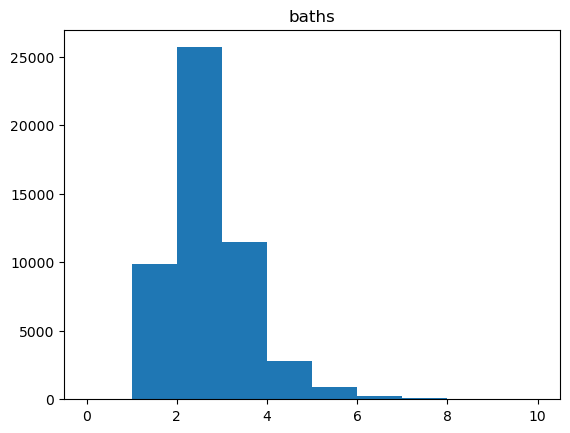

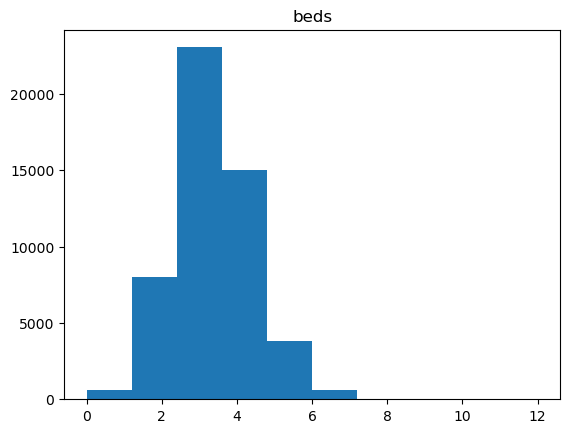

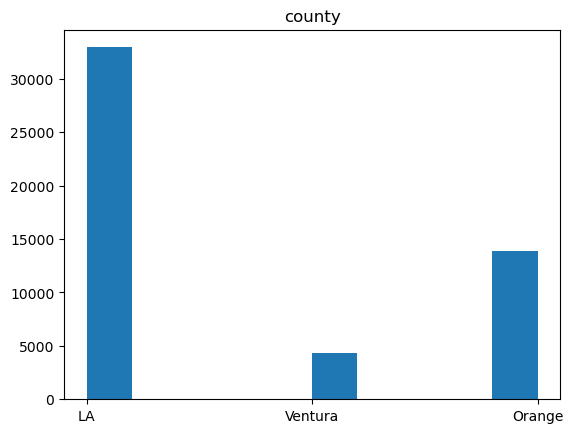

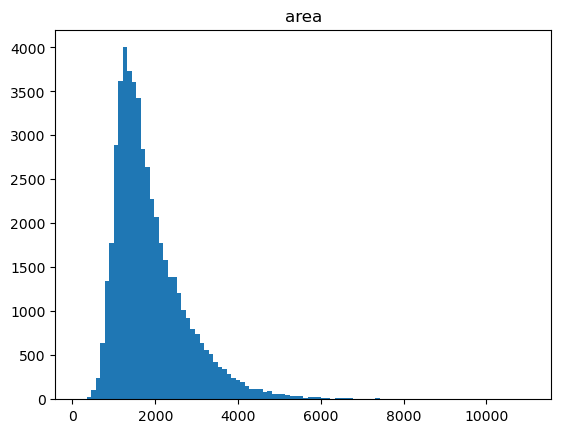

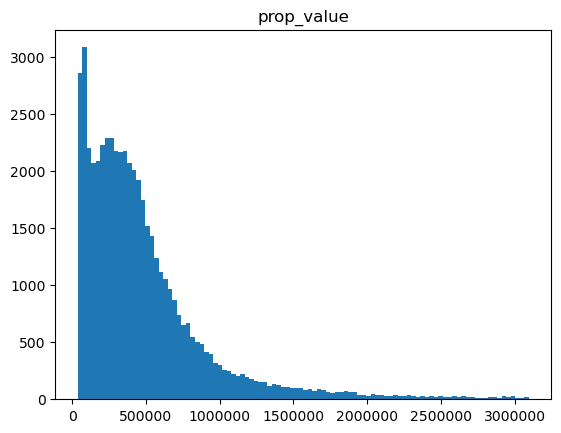

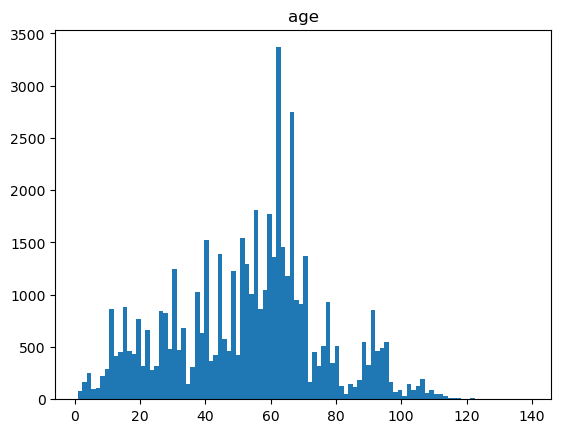

In [12]:
w.plot_histograms(df)

In [13]:
# def split_data(df, random_state=123):
#     """Split into train, validate, test with a 60% train, 20% validate, 20% test"""
#     train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
#     train, validate = train_test_split(train_validate, test_size=0.25, random_state=123)

#     print(f"train: {len(train)} ({round(len(train)/len(df)*100)}% of {len(df)})")
#     print(
#         f"validate: {len(validate)} ({round(len(validate)/len(df)*100)}% of {len(df)})"
#     )
#     print(f"test: {len(test)} ({round(len(test)/len(df)*100)}% of {len(df)})")
#     return train, validate, test

In [14]:
train, val, test = w.split_data(df)

train: 30693 (60% of 51156)
validate: 10231 (20% of 51156)
test: 10232 (20% of 51156)


In [15]:
# def kruskal(s1, s2, s3):
#     stat, p = stats.kruskal(s1, s2, s3)
#     print("Kruskal-Wallis H-Test:\n", f"stat = {stat}, p = {p}")

In [16]:
w.kruskal(
    train[train.county == "LA"].prop_value,
    train[train.county == "Orange"].prop_value,
    train[train.county == "Ventura"].prop_value,
)

Kruskal-Wallis H-Test:
 stat = 1043.8728842970488, p = 2.117791840364786e-227


In [17]:
# import seaborn as sns

# def plot_property_value_by_county(df):
#     """
#     This function creates a scatter plot of property values by county using the given dataframe.

#     :param df: The dataframe to use for plotting
#     :return: None
#     """
#     # Create a copy of the dataframe and scale the latitude and longitude labels
#     p = df.copy()
#     p = p.assign(lat=p.latitude / 1000000)
#     p = p.assign(long=p.longitude / 1000000)
#     p = p.sort_values("prop_value")

#     # Set the size of the plot
#     plt.figure(figsize=[12, 6])

#     # Create a generic legend example
#     sns.scatterplot(
#         data=p, y="lat", x="long", hue="prop_value", palette="Greys", alpha=1
#     )

#     # Create a scatter plot for each county, with hue on property value
#     sns.scatterplot(
#         data=p[p.county == "LA"], y="lat", x="long", hue="prop_value", palette="Reds"
#     )
#     sns.scatterplot(
#         data=p[p.county == "Orange"],
#         y="lat",
#         x="long",
#         hue="prop_value",
#         palette="Greens",
#     )
#     sns.scatterplot(
#         data=p[p.county == "Ventura"],
#         y="lat",
#         x="long",
#         hue="prop_value",
#         palette="Blues",
#     )

#     # Add county labels to the plot
#     plt.text(y=34, x=-119.25, s="Ventura County", fontsize=12, color="darkblue")
#     plt.text(y=33.9, x=-118.7, s="LA County", fontsize=12, color="darkred")
#     plt.text(y=33.5, x=-118.15, s="Orange County", fontsize=12, color="darkgreen")

#     # Add a generic legend to the plot
#     plt.legend(
#         title="Prop Value",
#         labels=["$400k", "$800k", "$1.2m", "$1.6m", "$2.0m"],
#         frameon=False,
#     )

#     # Add a title to the plot and hide the x and y axis labels
#     plt.title("Property Value based on County")
#     plt.gca().axes.get_xaxis().set_visible(False)
#     plt.gca().axes.get_yaxis().set_visible(False)

#     # Show the plot
#     plt.show()

Kruskal-Wallis H-Test:
 stat = 1043.8728842970488, p = 2.117791840364786e-227


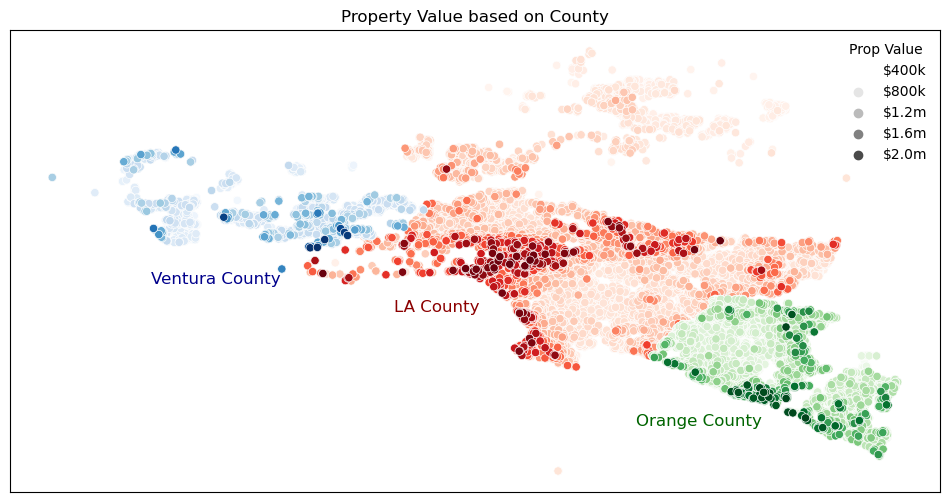

In [18]:
# explore average property value and counties

w.plot_property_value_by_county(train)

In [19]:
# def plot_correlations(df):
#     """
#     This function creates a bar plot of the correlations between each column in the given dataframe.

#     :param df: The dataframe to use for plotting
#     :return: None
#     """
#     # Get a list of all columns in the dataframe
#     cols = df.columns.to_list()

#     # Loop through each column and create a bar plot of its correlations with all other columns
#     for col in cols:
#         # Calculate the correlations between the current column and all other columns
#         corr = df[cols].corr()[col]
#         # Sort the correlations in descending order and create a bar plot
#         corr.sort_values(ascending=False).plot(kind="bar")
#         # Set the title of the plot to the current column name
#         plt.title(col)
#         # Show the plot
#         plt.show()

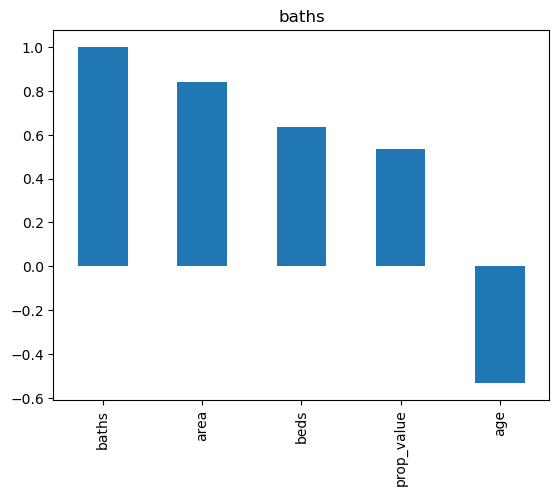

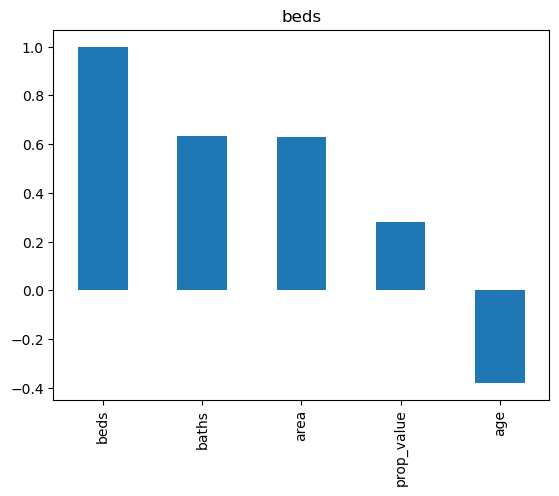

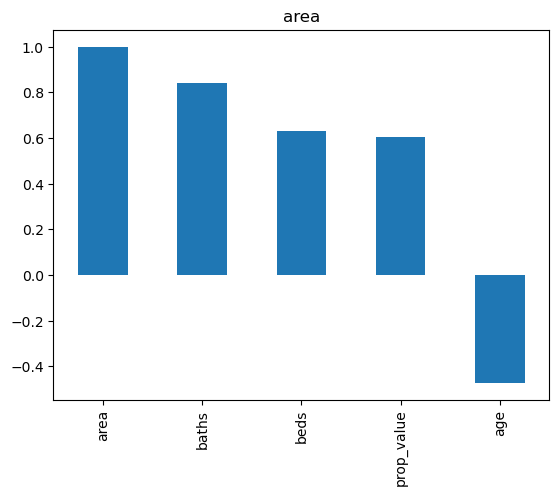

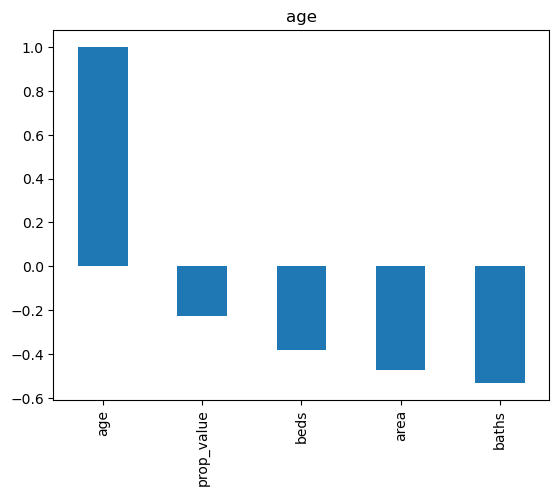

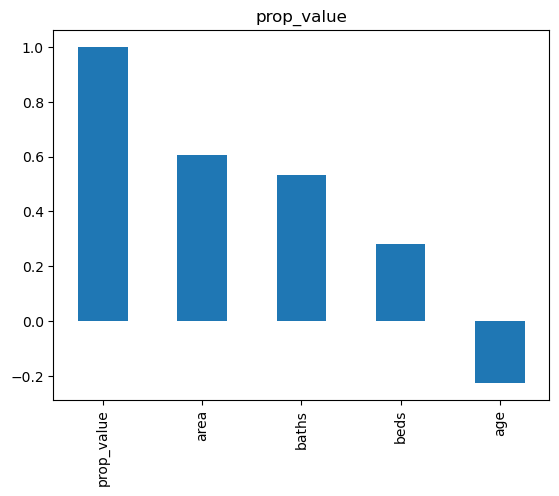

In [20]:
# temporarily drop columns and run the function

w.plot_correlations(df.drop(["county", "latitude", "longitude"], axis=1))

In [21]:
# import seaborn as sns

# def plot_lmplot(df, target):
#     """
#     Plot linear regression between each feature and target variable.

#     Args:
#         df (pandas.DataFrame): dataframe containing features and target variable
#         target (str): name of target variable

#     Returns:
#         None
#     """
#     for i in df.drop(columns=target):
#         sns.lmplot(x=i, y=target, data=df, line_kws={"color": "orange"})
#         plt.show()

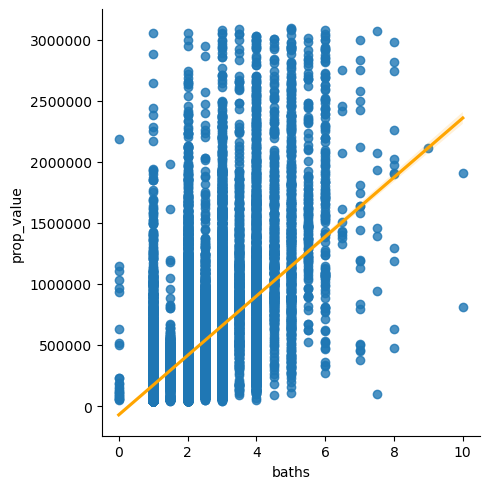

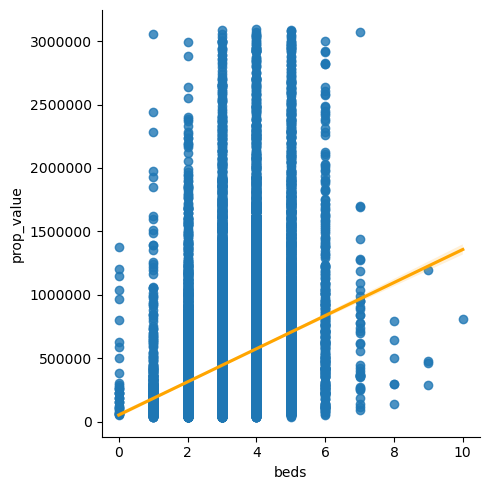

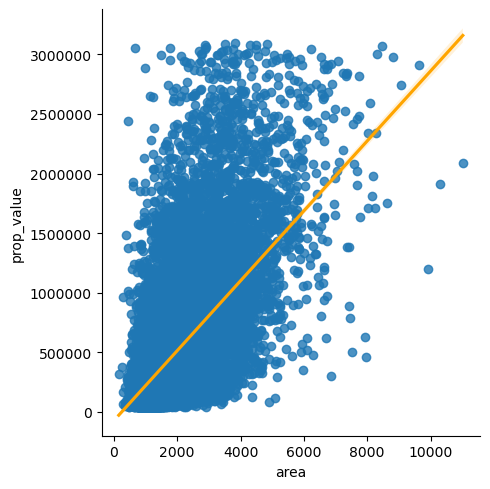

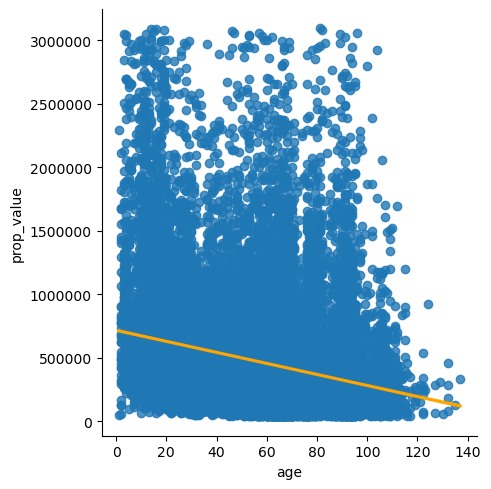

In [22]:
w.plot_lmplot(train.drop(columns=["county", "latitude", "longitude"]), "prop_value")

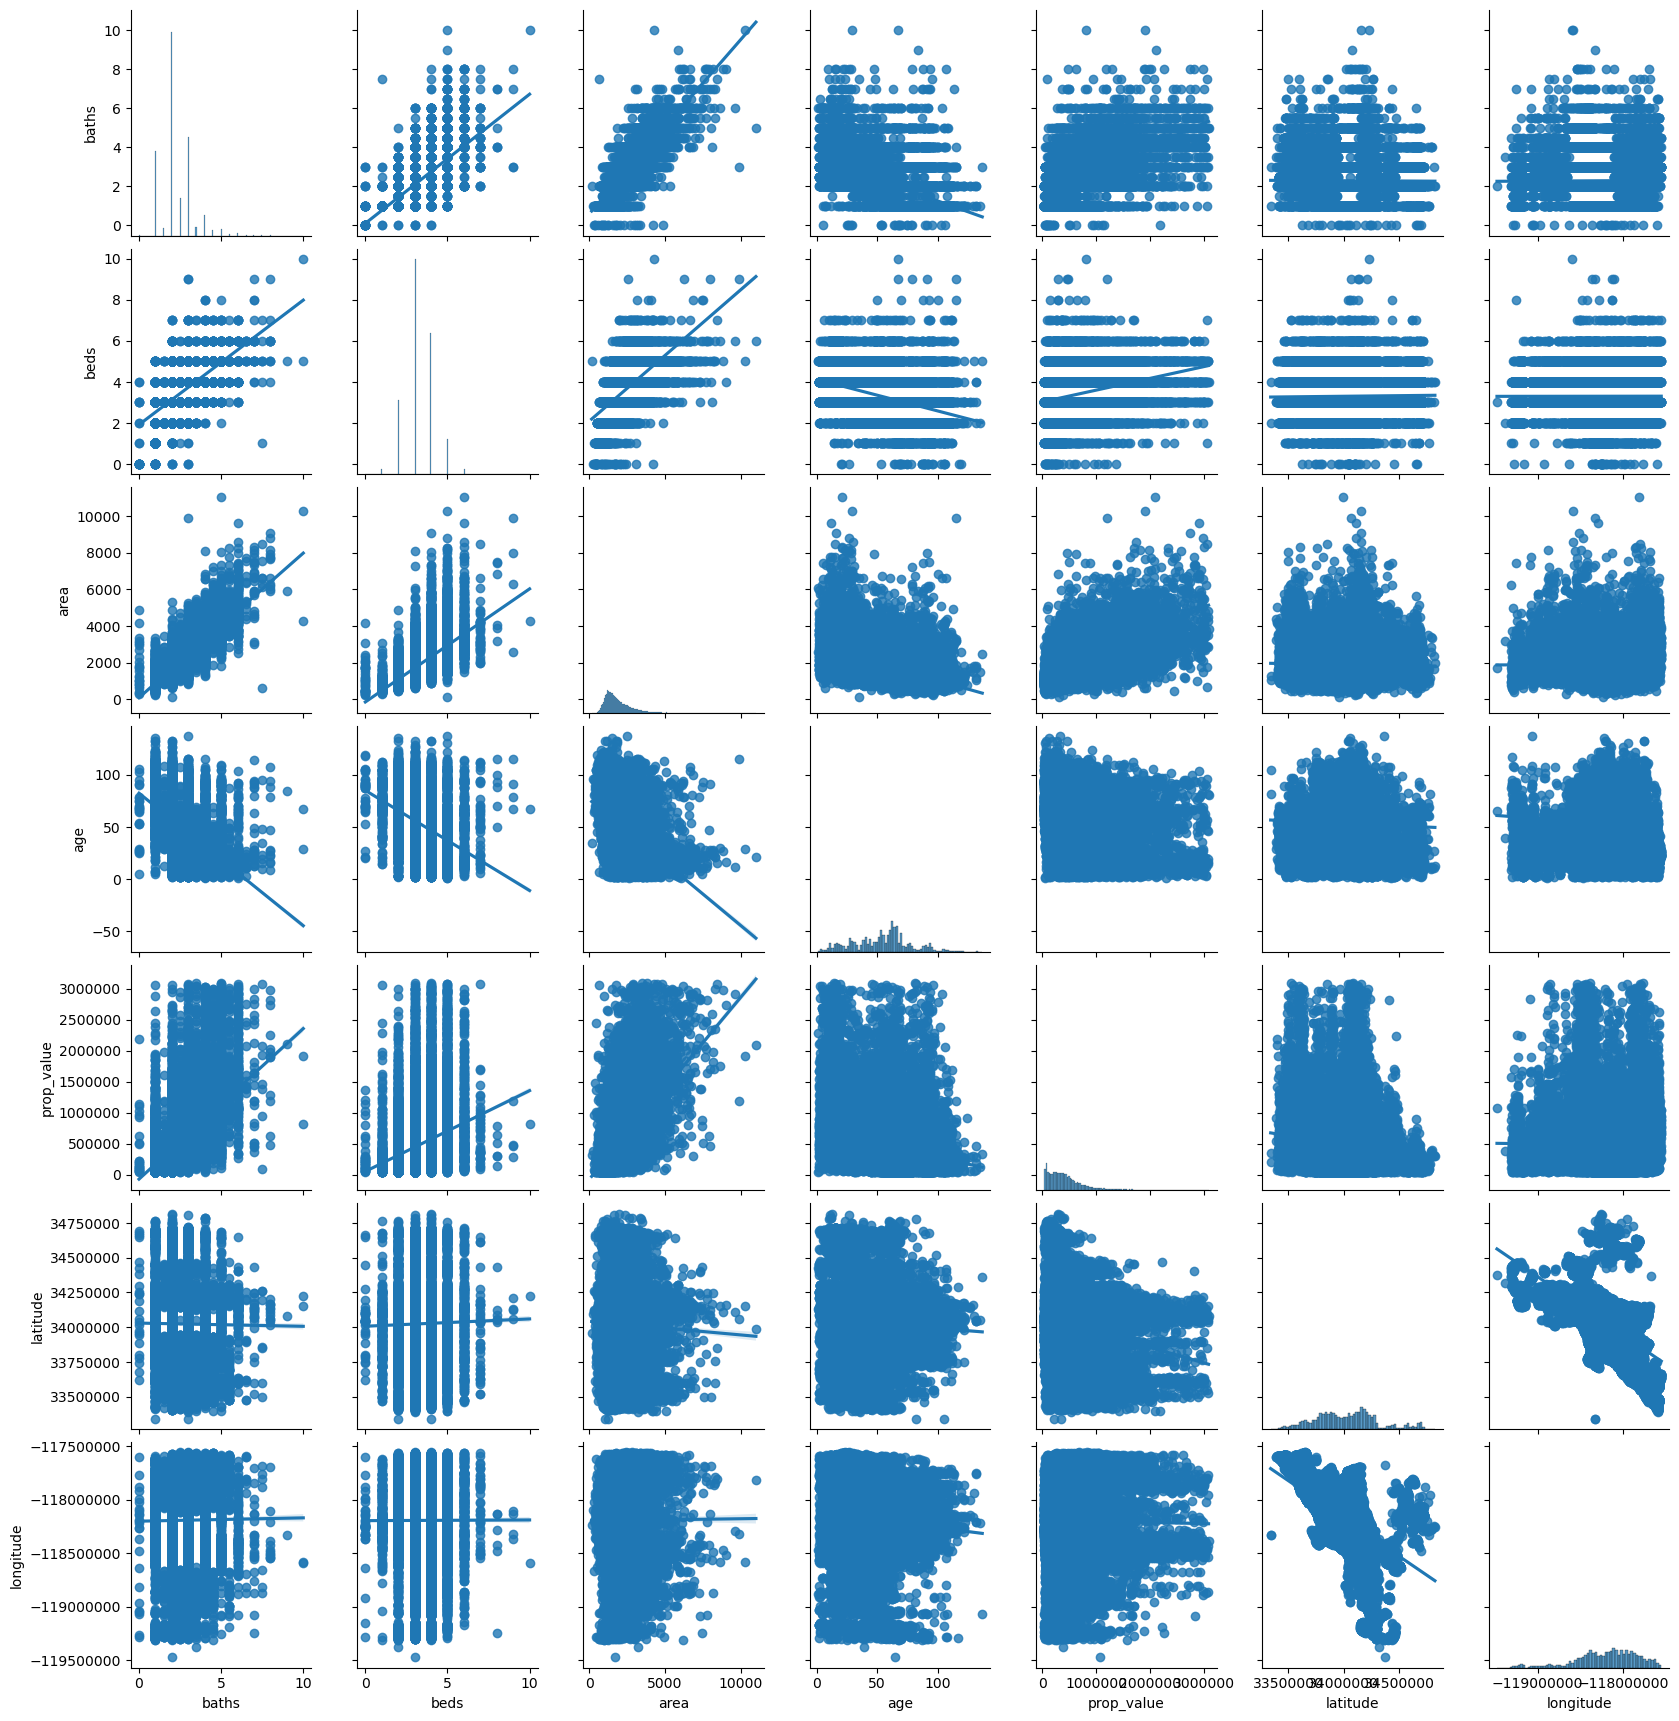

In [23]:
sns.pairplot(data=train, kind="reg")
plt.show()

In [24]:
# import itertools

# cols = train.drop(columns=['county','latitude','longitude']).columns.to_list()

# def pear(train, x, y, alt_hyp="two-sided"):
#     r, p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)
#     print(f"Spearman's R: {x} and {y}\n", f"r = {r}, p = {p}\n")


# for col in itertools.permutations(cols, 2):
#     # cont & cont
#     pear(train, col[0], col[1])

In [25]:
def box_plotter(df):
    """
    Generates a box plot for all columns in a dataframe using matplotlib.
    """
    for col in df.columns:
        try:
            plt.figure(figsize=(12, 1))
            plt.boxplot(df[col], vert=False)
            plt.title(col)
            plt.show()
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            print(
                f"Number of results in lower quartile: {len(df[df[col] < lower_bound])} ({(len(df[df[col] < lower_bound])/len(df))*100:.2f}%)"
            )
            print(
                f"Number of results in inner quartile: {len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])} ({(len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])/len(df))*100:.2f}%)"
            )
            print(
                f"Number of results in upper quartile: {len(df[df[col] > upper_bound])} ({(len(df[df[col] > upper_bound])/len(df))*100:.2f}%)"
            )
        except:
            print(
                f"Error: Could not generate box plot for column {col}. Skipping to next column..."
            )
            plt.close()
            continue

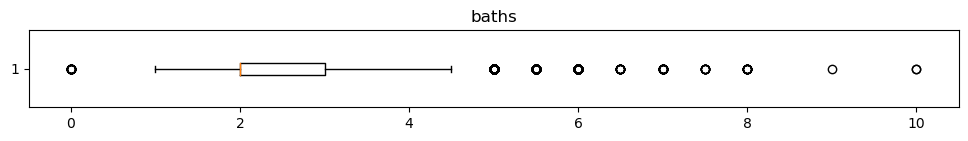

Number of results in lower quartile: 25 (0.08%)
Number of results in inner quartile: 29925 (97.50%)
Number of results in upper quartile: 743 (2.42%)


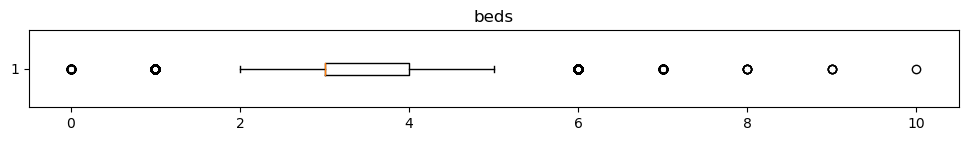

Number of results in lower quartile: 368 (1.20%)
Number of results in inner quartile: 29968 (97.64%)
Number of results in upper quartile: 357 (1.16%)


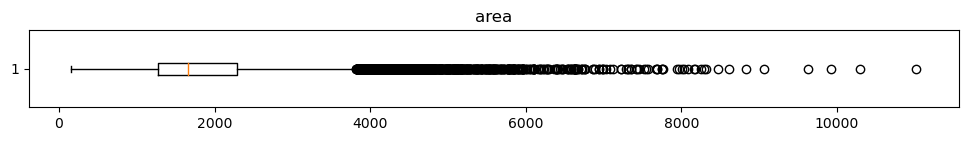

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 29519 (96.18%)
Number of results in upper quartile: 1174 (3.82%)


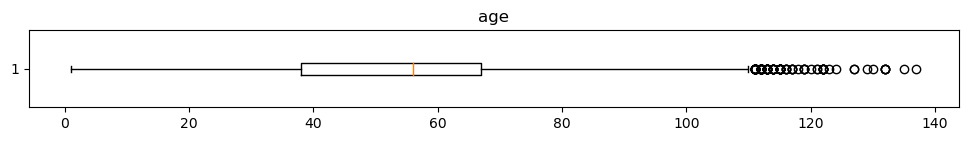

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 30565 (99.58%)
Number of results in upper quartile: 128 (0.42%)


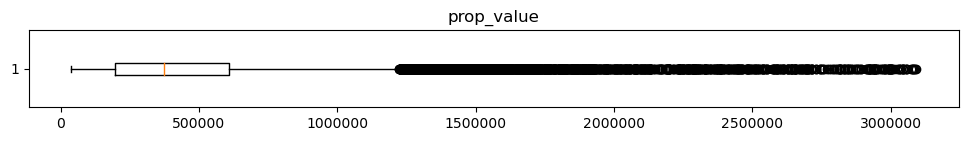

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 28800 (93.83%)
Number of results in upper quartile: 1893 (6.17%)
Error: Could not generate box plot for column county. Skipping to next column...


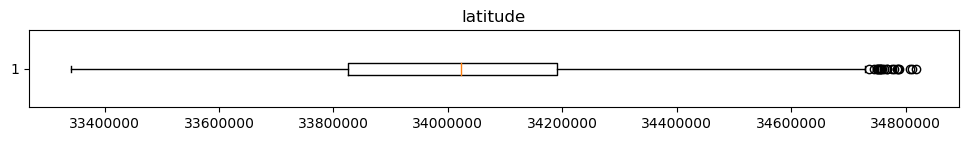

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 30672 (99.93%)
Number of results in upper quartile: 21 (0.07%)


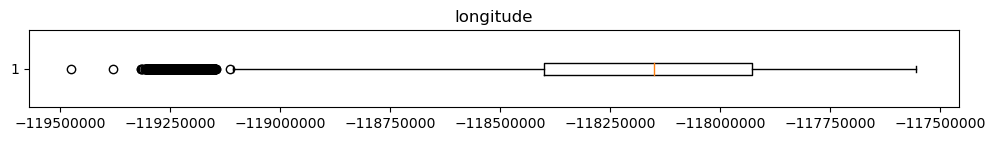

Number of results in lower quartile: 871 (2.84%)
Number of results in inner quartile: 29822 (97.16%)
Number of results in upper quartile: 0 (0.00%)


In [26]:
w.box_plotter(train)

### Due to outliers still remaining, we won't assume a normal distribution. For that reason, we'll use Spearman's

### Does area correlate with prop_value?
- H0 = No correlation
- Ha = Yes correlation

You can tell if a test is one-sided or two-sided by looking at the alternative hypothesis. 

In a two-sided test, the alternative hypothesis is that the true parameter is not equal to the null hypothesis value. For example, if the null hypothesis is that the mean of a population is equal to 10, then the alternative hypothesis for a two-sided test is that the mean of the population is not equal to 10.

In a one-sided test, the alternative hypothesis is that the true parameter is either greater than or less than the null hypothesis value. For example, if the null hypothesis is that the mean of a population is equal to 10, then the alternative hypothesis for a one-sided test could be that the mean of the population is greater than 10 (i.e., the alternative hypothesis is "greater than").

Note that the choice of a one-sided or two-sided test depends on the research question and the nature of the data. If the research question is focused on a specific direction of effect, then a one-sided test may be appropriate. If the research question is more general, then a two-sided test may be more appropriate.

In [27]:
# def spearman(train, x, y, alt_hyp="two-sided"):
#     sns.regplot(
#         data=train, x="area", y="prop_value", marker=".", line_kws={"color": "orange"}
#     )
#     plt.show()
#     r, p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)
#     print(f"Spearman's R: {x} and {y}\n", f"R = {r}, P = {p}\n")

Spearman's R: area and prop_value
 R = 0.5076782279486705, P = 0.0



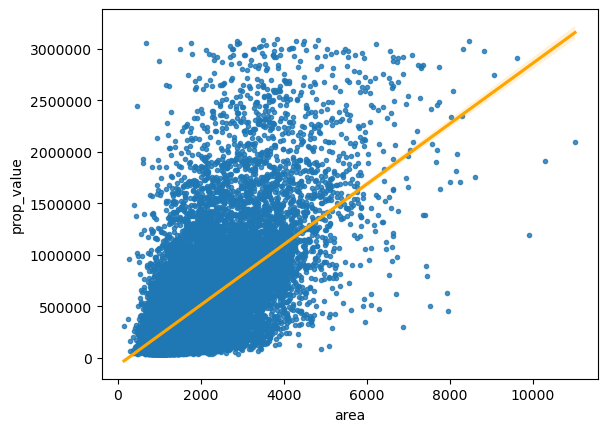

In [28]:
w.spearman(train, "area", "prop_value")

- less than alpha = .05
- yes correlation

### Does baths correlate with prop_value?
- H0 = No correlation
- Ha = Yes correlation

Spearman's R: baths and prop_value
 R = 0.46269586819165437, P = 0.0



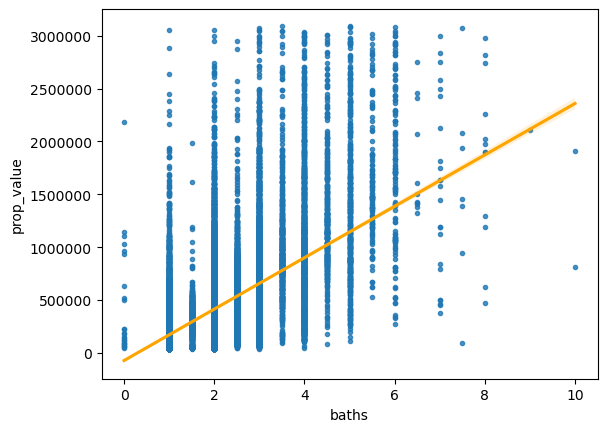

In [29]:
w.spearman(train, "baths", "prop_value")

In [30]:
# less than alpha = .05
# yes correlation

Spearman's R: beds and prop_value
 R = 0.2696927046560394, P = 0.0



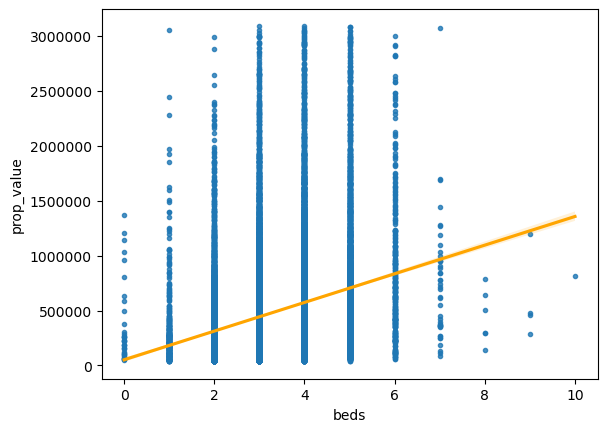

In [31]:
# Does beds correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
w.spearman(train, "beds", "prop_value")

In [32]:
# less than alpha = .05
# yes correlation

Spearman's R: baths and area
 R = 0.8308742596601902, P = 0.0



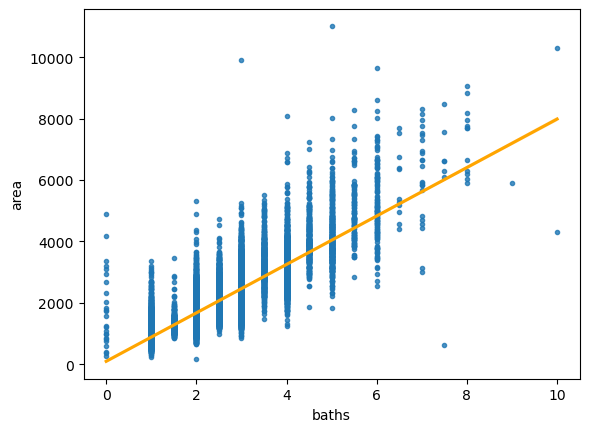

In [33]:
# Does baths correlate with area?
# H0 = No correlation
# Ha = Yes correlation
w.spearman(train, "baths", "area")

In [34]:
# less than alpha = .05
# yes correlation

In [35]:
# # Add a new column to the train dataframe that contains the sum of the beds and baths columns
# train = train.assign(beds_plus_baths=(train.beds + train.baths))

# # Add a new column to the validation dataframe that contains the sum of the beds and baths columns
# val = val.assign(beds_plus_baths=(val.beds + val.baths))

# # Add a new column to the test dataframe that contains the sum of the beds and baths columns
# test = test.assign(beds_plus_baths=(test.beds + test.baths))

In [36]:
# # Does baths correlate with area?
# # H0 = No correlation
# # Ha = Yes correlation
# sns.regplot(
#     data=train, x="beds_plus_baths", y="prop_value", marker=".", line_kws={"color": "orange"}
# )
# plt.show()

In [37]:
# pear(train, "beds_plus_baths", "prop_value")

In [38]:
# less than alpha = .05
# yes correlation

### While there seems to be a correlation between county and prop_value, I don't think it is necessarily the fact that it is in that county, I think it is more so the location and some counties have better locations. For that reason, we'll drop `county` and leave lat/long.

In [39]:
# Generate X Splits

X_train, X_val, X_test = (
    train.drop(columns=["prop_value", "county"]),
    val.drop(columns=["prop_value", "county"]),
    test.drop(columns=["prop_value", "county"]),
)

In [40]:
# from sklearn.preprocessing import StandardScaler


# def std_zillow(train, validate, test, scale=None):
#     """
#     Scale the numerical features of the train, validate, and test datasets using the Standard Scaler method.

#     Args:
#         train (pandas.DataFrame): training dataset
#         validate (pandas.DataFrame): validation dataset
#         test (pandas.DataFrame): test dataset
#         scale (list): list of columns to scale (default is None, which scales all numerical columns)

#     Returns:
#         tuple: Xtr (scaled training data), Xv (scaled validation data), and Xt (scaled test data)
#     """
#     # If scale is None, scale all numerical columns
#     if scale is None:
#         scale = train.select_dtypes(include=["float64", "int64"]).columns.to_list()

#     # Create a StandardScaler object
#     std_scale = StandardScaler()

#     # Create copies of the train, validate, and test dataframes
#     Xtr, Xv, Xt = train.copy(), validate.copy(), test.copy()

#     # Add "_std" to the column names of the columns to be scaled
#     scale_std = [col + "_std" for col in scale]

#     # Scale the columns in the train, validate, and test dataframes
#     Xtr[scale_std] = std_scale.fit_transform(train[scale])
#     Xv[scale_std] = std_scale.transform(validate[scale])
#     Xt[scale_std] = std_scale.transform(test[scale])

#     # Drop the unscaled columns from the train, validate, and test dataframes
#     Xtr.drop(columns=scale, inplace=True)
#     Xv.drop(columns=scale, inplace=True)
#     Xt.drop(columns=scale, inplace=True)

#     return Xtr, Xv, Xt

In [50]:
# Scale the numerical features of the train, validate, and test datasets using all scaler methods.

scale = ["baths", "beds", "area", "age", "latitude", "longitude"]

X_train_std, X_val_std, X_test_std = w.std_zillow(X_train, X_val, X_test, scale)
X_train_mm, X_val_mm, X_test_mm = w.mm_zillow(X_train, X_val, X_test, scale)
X_train_rob, X_val_rob, X_test_rob = w.rob_zillow(X_train, X_val, X_test, scale)

In [41]:
# from sklearn.preprocessing import MinMaxScaler


# def mm_zillow(train, validate, test, scale=None):
#     """
#     Scale the numerical features of the train, validate, and test datasets using the MinMax Scaler method.

#     Args:
#         train (pandas.DataFrame): training dataset
#         validate (pandas.DataFrame): validation dataset
#         test (pandas.DataFrame): test dataset
#         scale (list): list of columns to scale (default is None, which scales all numerical columns)

#     Returns:
#         tuple: Xtr (scaled training data), Xv (scaled validation data), and Xt (scaled test data)
#     """
#     # If scale is None, scale all numerical columns
#     if scale is None:
#         scale = train.select_dtypes(include=["float64", "int64"]).columns.to_list()

#     # Create a MinMaxScaler object
#     mm_scale = MinMaxScaler()

#     # Create copies of the train, validate, and test dataframes
#     Xtr, Xv, Xt = train.copy(), validate.copy(), test.copy()

#     # Add "_mm" to the column names of the columns to be scaled
#     scale_mm = [col + "_mm" for col in scale]

#     # Scale the columns in the train, validate, and test dataframes
#     Xtr[scale_mm] = mm_scale.fit_transform(train[scale])
#     Xv[scale_mm] = mm_scale.transform(validate[scale])
#     Xt[scale_mm] = mm_scale.transform(test[scale])

#     # Drop the unscaled columns from the train, validate, and test dataframes
#     Xtr.drop(columns=scale, inplace=True)
#     Xv.drop(columns=scale, inplace=True)
#     Xt.drop(columns=scale, inplace=True)

#     return Xtr, Xv, Xt

In [42]:
# # Scale the numerical features of the train, validate, and test datasets using the MinMax Scaler method.

# scale = ["baths", "beds", "area", "age", "latitude", "longitude"]

# X_train_mm, X_val_mm, X_test_mm = w.mm_zillow(X_train, X_val, X_test, scale)

In [43]:
# from sklearn.preprocessing import RobustScaler


# def rob_zillow(train, validate, test, scale=None):
#     """
#     Scale the numerical features of the train, validate, and test datasets using the Robust Scaler method.

#     Args:
#         train (pandas.DataFrame): training dataset
#         validate (pandas.DataFrame): validation dataset
#         test (pandas.DataFrame): test dataset
#         scale (list): list of columns to scale (default is None, which scales all columns)

#     Returns:
#         tuple: Xtr (scaled training data), Xv (scaled validation data), and Xt (scaled test data)
#     """
#     # If scale is None, scale all columns
#     if scale is None:
#         scale = train.columns.to_list()

#     # Create a RobustScaler object
#     rob_scale = RobustScaler()

#     # Create copies of the train, validate, and test dataframes
#     Xtr, Xv, Xt = train.copy(), validate.copy(), test.copy()

#     # Add "_rob" to the column names of the columns to be scaled
#     scale_rob = [col + "_rob" for col in scale]

#     # Scale the columns in the train, validate, and test dataframes
#     Xtr[scale_rob] = rob_scale.fit_transform(train[scale])
#     Xv[scale_rob] = rob_scale.transform(validate[scale])
#     Xt[scale_rob] = rob_scale.transform(test[scale])

#     # Drop the unscaled columns from the train, validate, and test dataframes
#     Xtr.drop(columns=scale, inplace=True)
#     Xv.drop(columns=scale, inplace=True)
#     Xt.drop(columns=scale, inplace=True)

#     return Xtr, Xv, Xt

In [44]:
# # Scale the numerical features of the train, validate, and test datasets using the Robust Scaler method.

# scale = ["baths", "beds", "area", "age", "latitude", "longitude"]

# X_train_rob, X_val_rob, X_test_rob = rob_zillow(X_train, X_val, X_test, scale)

In [45]:
# Generate Y Splits, dropping the target

y_train, y_val, y_test = (
    train[["prop_value"]],
    val[["prop_value"]],
    test[["prop_value"]],
)

In [46]:
# Establish Baseline with mean

y_train.mean()

prop_value    483036.26019
dtype: float64

In [47]:
# from sklearn.metrics import mean_squared_error, r2_score


# def metrics_reg(y_true, y_pred):
#     """
#     Calculate the root mean squared error (RMSE) and R-squared (R2) for a regression model.

#     Args:
#         y_true (array-like): true target values
#         y_pred (array-like): predicted target values

#     Returns:
#         tuple: RMSE and R2
#     """
#     # Calculate the RMSE
#     rmse = mean_squared_error(y_true, y_pred, squared=False)

#     # Calculate the R2
#     r2 = r2_score(y_true, y_pred)

#     return rmse, r2

In [48]:
# import itertools
# import pandas as pd
# from sklearn.linear_model import LinearRegression, LassoLars
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import TweedieRegressor


# def reg_mods(Xtr, ytr, Xv, yv, features=None, alpha=1, degree=2, power=2):
#     """
#     Run multiple regression models with different feature combinations, hyperparameters, and output the results as a dataframe.

#     Args:
#         Xtr (pandas.DataFrame): training features
#         ytr (pandas.DataFrame): training target
#         Xv (pandas.DataFrame): validation features
#         yv (pandas.DataFrame): validation target
#         features (list): list of features to use in the models (default: all features)
#         alpha (float or list): regularization strength for LassoLars and TweedieRegressor (default: 1)
#         degree (int or list): degree of polynomial features for PolynomialFeatures (default: 2)
#         power (float or list): power parameter for TweedieRegressor (default: 2)

#     Returns:
#         pandas.DataFrame: dataframe with the results of each model
#     """
#     if features is None:
#         features = Xtr.columns.to_list()

#     # Calculate baseline metrics using mean
#     pred_mean = ytr.mean()[0]
#     ytr_p = ytr.assign(pred_mean=pred_mean)
#     yv_p = yv.assign(pred_mean=pred_mean)
#     rmse_tr = mean_squared_error(ytr, ytr_p.pred_mean) ** 0.5
#     rmse_v = mean_squared_error(yv, yv_p.pred_mean) ** 0.5
#     r2_tr = r2_score(ytr, ytr_p.pred_mean)
#     r2_v = r2_score(yv, yv_p.pred_mean)
#     output = {
#         "model": "bl_mean",
#         "features": "None",
#         "params": "None",
#         "rmse_tr": rmse_tr,
#         "rmse_v": rmse_v,
#         "r2_tr": r2_tr,
#         "r2_v": r2_v,
#     }
#     metrics = [output]

#     # Iterate through feature combinations
#     for r in range(1, (len(features) + 1)):
#         # Cycle through feature combinations for linear regression
#         for feature in itertools.combinations(features, r):
#             f = list(feature)
#             # Linear regression
#             lr = LinearRegression()
#             lr.fit(Xtr[f], ytr)
#             # Metrics
#             pred_lr_tr = lr.predict(Xtr[f])
#             rmse_tr, r2_tr = metrics_reg(ytr, pred_lr_tr)
#             pred_lr_v = lr.predict(Xv[f])
#             rmse_v, r2_v = metrics_reg(yv, pred_lr_v)
#             # Make it into a table for visualizing later
#             output = {
#                 "model": "LinearRegression",
#                 "features": f,
#                 "params": "None",
#                 "rmse_tr": rmse_tr,
#                 "rmse_v": rmse_v,
#                 "r2_tr": r2_tr,
#                 "r2_v": r2_v,
#             }
#             metrics.append(output)

#         # Cycle through feature combinations and alphas for LassoLars
#         for feature, a in itertools.product(itertools.combinations(features, r), alpha):
#             f = list(feature)
#             # LassoLars
#             ll = LassoLars(alpha=a, normalize=False, random_state=123)
#             ll.fit(Xtr[f], ytr)
#             # Metrics
#             pred_ll_tr = ll.predict(Xtr[f])
#             rmse_tr, r2_tr = metrics_reg(ytr, pred_ll_tr)
#             pred_ll_v = ll.predict(Xv[f])
#             rmse_v, r2_v = metrics_reg(yv, pred_ll_v)
#             # Make it into a table for visualizing later
#             output = {
#                 "model": "LassoLars",
#                 "features": f,
#                 "params": f"alpha={a}",
#                 "rmse_tr": rmse_tr,
#                 "rmse_v": rmse_v,
#                 "r2_tr": r2_tr,
#                 "r2_v": r2_v,
#             }
#             metrics.append(output)

#         # Cycle through feature combinations and degrees for polynomial feature regression
#         for feature, d in itertools.product(
#             itertools.combinations(features, r), degree
#         ):
#             f = list(feature)
#             # Polynomial feature regression
#             pf = PolynomialFeatures(degree=d)
#             Xtr_pf = pf.fit_transform(Xtr[f])
#             Xv_pf = pf.transform(Xv[f])
#             lp = LinearRegression()
#             lp.fit(Xtr_pf, ytr)
#             # Metrics
#             pred_lp_tr = lp.predict(Xtr_pf)
#             rmse_tr, r2_tr = metrics_reg(ytr, pred_lp_tr)
#             pred_lp_v = lp.predict(Xv_pf)
#             rmse_v, r2_v = metrics_reg(yv, pred_lp_v)
#             # Make it into a table for visualizing later
#             output = {
#                 "model": "PolynomialFeature",
#                 "features": f,
#                 "params": f"degree={d}",
#                 "rmse_tr": rmse_tr,
#                 "rmse_v": rmse_v,
#                 "r2_tr": r2_tr,
#                 "r2_v": r2_v,
#             }
#             metrics.append(output)

#         # Cycle through feature combinations, alphas, and powers for TweedieRegressor
#         for feature, a, p in itertools.product(
#             itertools.combinations(features, r), alpha, power
#         ):
#             f = list(feature)
#             # TweedieRegressor
#             lm = TweedieRegressor(power=p, alpha=a)
#             lm.fit(Xtr[f], ytr.prop_value)
#             # Metrics
#             pred_lm_tr = lm.predict(Xtr[f])
#             rmse_tr, r2_tr = metrics_reg(ytr, pred_lm_tr)
#             pred_lm_v = lm.predict(Xv[f])
#             rmse_v, r2_v = metrics_reg(yv, pred_lm_v)
#             # Make it into a table for visualizing later
#             output = {
#                 "model": "TweedieRegressor",
#                 "features": f,
#                 "params": f"power={p},alpha={a}",
#                 "rmse_tr": rmse_tr,
#                 "rmse_v": rmse_v,
#                 "r2_tr": r2_tr,
#                 "r2_v": r2_v,
#             }
#             metrics.append(output)

#     return pd.DataFrame(metrics)

In [51]:
# Run multiple regression models with different feature combinations, hyperparameters, and output the results as a dataframe.

# StandardScaler Models
metrics_std_scale = w.reg_mods(
    X_train_std,
    y_train,
    X_val_std,
    y_val,
    alpha=[1, 2, 3, 4, 5, 6, 7, 8, 9],
    degree=[2, 3, 4, 5],
    power=[1, 1.25, 1.5, 1.75, 2],
)

metrics_mm_scale = w.reg_mods(
    X_train_mm,
    y_train,
    X_val_mm,
    y_val,
    alpha=[1, 2, 3, 4, 5, 6, 7, 8, 9],
    degree=[2, 3, 4, 5],
    power=[1, 1.25, 1.5, 1.75, 2],
)

metrics_rob_scale = w.reg_mods(
    X_train_rob,
    y_train,
    X_val_rob,
    y_val,
    alpha=[1, 2, 3, 4, 5, 6, 7, 8, 9],
    degree=[2, 3, 4, 5],
    power=[1, 1.25, 1.5, 1.75, 2],
)

In [52]:
# Run multiple regression models with different feature combinations, hyperparameters, and output the results as a dataframe.

# MinMaxScaler Models
metrics_mm_scale = w.reg_mods(
    X_train_mm,
    y_train,
    X_val_mm,
    y_val,
    alpha=[1, 2, 3, 4, 5, 6, 7, 8, 9],
    degree=[2, 3, 4, 5],
    power=[1, 1.25, 1.5, 1.75, 2],
)

In [53]:
# Run multiple regression models with different feature combinations, hyperparameters, and output the results as a dataframe.

# RobustScaler Models
metrics_rob_scale = w.reg_mods(
    X_train_rob,
    y_train,
    X_val_rob,
    y_val,
    alpha=[1, 2, 3, 4, 5, 6, 7, 8, 9],
    degree=[2, 3, 4, 5],
    power=[1, 1.25, 1.5, 1.75, 2],
)

In [54]:
# Concatenate the dataframes along axis 1 (columns)

all_scalers = pd.concat(
    [metrics_rob_scale, metrics_mm_scale, metrics_std_scale], axis=0
)

In [55]:
# Total Models Ran

all_scalers.value_counts("model").sum()

11154

In [56]:
# Top 3 Polynomial (Sorted by highest r2 then lowest RMSE on validate set)

all_scalers[all_scalers.model == "PolynomialFeature"].sort_values(
    by=["r2_v", "rmse_v"],
    ascending=[False, True],
    key=lambda x: x.round(2) if x.name == "r2_v" else x.round(0),
).iloc[[0, 1, 2]]

# Temporarily increase column size for viewing

pd.set_option("display.max_colwidth", None)

In [57]:
# Top 3 TweedieRegressor (Sorted by highest r2 then lowest RMSE on validate set)

all_scalers[all_scalers.model == "TweedieRegressor"].sort_values(
    by=["r2_v", "rmse_v"],
    ascending=[False, True],
    key=lambda x: x.round(2) if x.name == "r2_v" else x.round(0),
).iloc[[0, 1, 2]]

,model,features,params,rmse_tr,rmse_v,r2_tr,r2_v
3685,TweedieRegressor,"[baths_mm, beds_mm, area_mm, age_mm, latitude_mm, longitude_mm]","power=1.5,alpha=3",344153.979632,336331.326482,0.377729,0.385330
3581,TweedieRegressor,"[baths_mm, area_mm, age_mm, latitude_mm, longitude_mm]","power=1.5,alpha=3",344363.649405,336453.360417,0.376971,0.384884
3491,TweedieRegressor,"[baths_mm, beds_mm, area_mm, latitude_mm, longitude_mm]","power=1.5,alpha=3",344860.645848,336606.674898,0.375171,0.384323


In [58]:
# Top 3 LassoLars (Sorted by highest r2 then lowest RMSE on validate set)

all_scalers[all_scalers.model == "LassoLars"].sort_values(
    by=["r2_v", "rmse_v"],
    ascending=[False, True],
    key=lambda x: x.round(2) if x.name == "r2_v" else x.round(0),
).iloc[[0, 1, 2]]

,model,features,params,rmse_tr,rmse_v,r2_tr,r2_v
3668,LassoLars,"[baths_mm, beds_mm, area_mm, age_mm, latitude_mm, longitude_mm]",alpha=9,329285.691243,324868.290209,0.430335,0.426515
3667,LassoLars,"[baths_mm, beds_mm, area_mm, age_mm, latitude_mm, longitude_mm]",alpha=8,329285.665962,324868.943131,0.430335,0.426513
3665,LassoLars,"[baths_mm, beds_mm, area_mm, age_mm, latitude_mm, longitude_mm]",alpha=6,329285.624321,324870.257876,0.430335,0.426508


In [59]:
# Top 3 LinearRegression (Sorted by highest r2 then lowest RMSE on validate set)

all_scalers[all_scalers.model == "LinearRegression"].sort_values(
    by=["r2_v", "rmse_v"],
    ascending=[False, True],
    key=lambda x: x.round(2) if x.name == "r2_v" else x.round(0),
).iloc[[0, 1, 2]]

,model,features,params,rmse_tr,rmse_v,r2_tr,r2_v
3659,LinearRegression,"[baths_rob, beds_rob, area_rob, age_rob, latitude_rob, longitude_rob]",None,329285.570783,324874.273313,0.430336,0.426494
3659,LinearRegression,"[baths_mm, beds_mm, area_mm, age_mm, latitude_mm, longitude_mm]",None,329285.570783,324874.273313,0.430336,0.426494
3659,LinearRegression,"[baths_std, beds_std, area_std, age_std, latitude_std, longitude_std]",None,329285.570783,324874.273313,0.430336,0.426494


In [60]:
# Top 3 overall model (Sorted by highest r2 then lowest RMSE on validate set)

all_scalers.sort_values(
    by=["r2_v", "rmse_v"],
    ascending=[False, True],
    key=lambda x: x.round(2) if x.name == "r2_v" else x.round(0),
).iloc[[0, 1, 2]]

,model,features,params,rmse_tr,rmse_v,r2_tr,r2_v
3670,PolynomialFeature,"[baths_rob, beds_rob, area_rob, age_rob, latitude_rob, longitude_rob]",degree=3,310552.807989,311670.551521,0.493307,0.472164
3670,PolynomialFeature,"[baths_mm, beds_mm, area_mm, age_mm, latitude_mm, longitude_mm]",degree=3,310552.807989,311670.551521,0.493307,0.472164
3670,PolynomialFeature,"[baths_std, beds_std, area_std, age_std, latitude_std, longitude_std]",degree=3,310552.807989,311670.551521,0.493307,0.472164


In [ ]:
# Baseline stats

all_scalers[all_scalers.model == "bl_mean"]

,model,features,params,rmse_tr,rmse_v,r2_tr,r2_v
0,bl_mean,None,None,436277.848203,429043.864022,0.0,-0.000255
0,bl_mean,None,None,436277.848203,429043.864022,0.0,-0.000255
0,bl_mean,None,None,436277.848203,429043.864022,0.0,-0.000255


### Best Performer was PolynomialFeature with all features scaled with RobustScaler and a degree of 3

In [ ]:
all_scalers.sort_values(
    by=["r2_v", "rmse_v"],
    ascending=[False, True],
    key=lambda x: x.round(2) if x.name == "r2_v" else x.round(0),
).iloc[[0]][["features", "params"]]

,features,params
3670,"[baths_rob, beds_rob, area_rob, age_rob, latitude_rob, longitude_rob]",degree=3


In [ ]:
# Set display back to default
pd.set_option("display.max_colwidth", 20)

In [ ]:
# from sklearn.linear_model import LinearRegression, LassoLars
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import TweedieRegressor


# def mvp_model(
#     model, X_train, y_train, X_val, y_val, features, power=1.5, degree=3, alpha=9
# ):
#     """
#     Train and evaluate a MVP model using the specified algorithm.

#     Args:
#         model (str): algorithm to use (lr, poly, lasso, tweedie)
#         X_train (pandas.DataFrame): training features
#         y_train (pandas.Series): training target
#         X_val (pandas.DataFrame): validation features
#         y_val (pandas.Series): validation target
#         features (list): list of features to use in the model
#         power (float): power parameter for TweedieRegressor (default: 1.5)
#         degree (int): degree of polynomial features for PolynomialFeatures (default: 3)
#         alpha (float): alpha parameter for LassoLars (default: 9)

#     Returns:
#         None
#     """
#     # Linear Regression
#     if model == "lr":
#         # Create LinearRegression object
#         lr = LinearRegression()
#         # Fit the model
#         lr.fit(X_train[features], y_train)
#         # Make predictions
#         pred_lr_tr = lr.predict(X_train[features])
#         pred_lr_v = lr.predict(X_val[features])
#         # Calculate metrics
#         rmse_tr, r2_tr = metrics_reg(y_train, pred_lr_tr)
#         rmse_v, r2_v = metrics_reg(y_val, pred_lr_v)
#         # Print results
#         print("Linear Regression")
#         print(f"Train       RMSE: {rmse_tr}     R2: {r2_tr}")
#         print(f"Validate    RMSE: {rmse_v}    R2: {r2_v}")
#     # Polynomial Features through Linear Regression
#     elif model == "poly":
#         # Create PolynomialFeatures object
#         pf = PolynomialFeatures(degree=degree)
#         # Transform the features
#         X_train_pf = pf.fit_transform(X_train[features])
#         X_val_pf = pf.transform(X_val[features])
#         # Create LinearRegression object
#         pr = LinearRegression()
#         # Fit the model
#         pr.fit(X_train_pf, y_train)
#         # Make predictions
#         pred_pr_tr = pr.predict(X_train_pf)
#         pred_pr_v = pr.predict(X_val_pf)
#         # Calculate metrics
#         rmse_tr, r2_tr = metrics_reg(y_train, pred_pr_tr)
#         rmse_v, r2_v = metrics_reg(y_val, pred_pr_v)
#         # Print results
#         print("Polynomial Features through Linear Regression")
#         print(f"Train       RMSE: {rmse_tr}    R2: {r2_tr}")
#         print(f"Validate    RMSE: {rmse_v}     R2: {r2_v}")
#     # Lasso Lars
#     elif model == "lasso":
#         # Create LassoLars object
#         ll = LassoLars(alpha=alpha, normalize=False)
#         # Fit the model
#         ll.fit(X_train[features], y_train)
#         # Make predictions
#         pred_ll_tr = ll.predict(X_train[features])
#         pred_ll_v = ll.predict(X_val[features])
#         # Calculate metrics
#         rmse_tr, r2_tr = metrics_reg(y_train, pred_ll_tr)
#         rmse_v, r2_v = metrics_reg(y_val, pred_ll_v)
#         # Print results
#         print("Lasso Lars")
#         print(f"Train       RMSE: {rmse_tr}     R2: {r2_tr}")
#         print(f"Validate    RMSE: {rmse_v}    R2: {r2_v}")
#     # Tweedie Regressor
#     elif model == "tweedie":
#         # Create TweedieRegressor object
#         tw = TweedieRegressor(power=power, alpha=alpha)
#         # Fit the model
#         tw.fit(X_train[features], y_train.prop_value)
#         # Make predictions
#         pred_tw_tr = tw.predict(X_train[features])
#         pred_tw_v = tw.predict(X_val[features])
#         # Calculate metrics
#         rmse_tr, r2_tr = metrics_reg(y_train, pred_tw_tr)
#         rmse_v, r2_v = metrics_reg(y_val, pred_tw_v)
#         # Print results
#         print("Tweedie Regressor")
#         print(f"Train       RMSE: {rmse_tr}     R2: {r2_tr}")
#         print(f"Validate    RMSE: {rmse_v}       R2: {r2_v}")
#     else:
#         print("Please include model argument: lr, poly, lasso, tweedie")

In [ ]:
# from sklearn.linear_model import LinearRegression, LassoLars
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import TweedieRegressor


# def poly_model(X_train, y_train, X_val, y_val, features, degree=3):
#     """
#     Train a model on the train set and evaluate model using the specified algorithm on the validate set.

#     Args:
#         X_train (pandas.DataFrame): training features
#         y_train (pandas.Series): training target
#         X_val (pandas.DataFrame): validation features
#         y_val (pandas.Series): validation target
#         features (list): list of features to use in the model
#         degree (int): degree of polynomial features for PolynomialFeatures (default: 3)
#     Returns:
#         None
#     """
#     pf = PolynomialFeatures(degree=degree)
#     # Transform the features
#     X_train_pf = pf.fit_transform(X_train[features])
#     X_val_pf = pf.transform(X_val[features])
#     # Create LinearRegression object
#     pr = LinearRegression()
#     # Fit the model
#     pr.fit(X_train_pf, y_train)
#     # Make predictions
#     pred_pr_tr = pr.predict(X_train_pf)
#     pred_pr_v = pr.predict(X_val_pf)
#     # Calculate metrics
#     rmse_tr, r2_tr = metrics_reg(y_train, pred_pr_tr)
#     rmse_v, r2_v = metrics_reg(y_val, pred_pr_v)
#     # Print results
#     print("Polynomial Features through Linear Regression")
#     print(f"Train       RMSE: {rmse_tr}    R2: {r2_tr}")
#     print(f"Validate    RMSE: {rmse_v}     R2: {r2_v}")

In [ ]:
# Train and evaluate a MVP model using the specified algorithm with specified hyperparams
features = [
    "baths_rob",
    "beds_rob",
    "area_rob",
    "age_rob",
    "latitude_rob",
    "longitude_rob",
]

# LinearRegression Model
w.poly_model(X_train_rob, y_train, X_val_rob, y_val, features=features, degree=3)

Polynomial Features through Linear Regression
Train       RMSE: 310552.8079894672    R2: 0.4933073599650756
Validate    RMSE: 311670.55152148777     R2: 0.47216427668551975


In [ ]:
# # Train and evaluate a MVP model using the specified algorithm.

# # PolynomialRegression Model
# mvp_model("poly", X_train_rob, y_train, X_val_rob, y_val)

In [ ]:
# # Train and evaluate a MVP model using the specified algorithm.

# # LassoLars Model
# mvp_model("lasso", X_train_mm, y_train, X_val_mm, y_val)

In [ ]:
# # Train and evaluate a MVP model using the specified algorithm.

# # TweedieRegressor Model
# mvp_model("tweedie", X_train_mm, y_train, X_val_mm, y_val)

In [ ]:
# def poly_test_model(X_train, y_train, X_test, y_test, features, degree):
#     """
#     Test a polynomial feature regression model using the specified features and targets.

#     Args:
#         X_train (pandas.DataFrame): training features
#         y_train (pandas.Series): training target
#         X_test (pandas.DataFrame): test features
#         y_test (pandas.Series): test target

#     Returns:
#         None
#     """
#     # Select features
#     f = features

#     # Create PolynomialFeatures object
#     pf = PolynomialFeatures(degree=degree)

#     # Transform the features
#     X_train_pf = pf.fit_transform(X_train[f])
#     X_test_pf = pf.transform(X_test[f])

#     # Create LinearRegression object
#     pr = LinearRegression()

#     # Fit the model
#     pr.fit(X_train_pf, y_train)

#     # Make predictions
#     pred_pr_t = pr.predict(X_test_pf)

#     # Calculate metrics
#     rmse_t, r2_t = metrics_reg(y_test, pred_pr_t)

#     # Print results
#     print("Polynomial Features through Linear Regression")
#     print(f"Test    RMSE: {rmse_t}    R2: {r2_t}")

In [ ]:
# Features
features = [
    "baths_rob",
    "beds_rob",
    "area_rob",
    "age_rob",
    "latitude_rob",
    "longitude_rob",
]

# Test a polynomial feature regression model using the specified features and targets.
w.poly_test_model(X_train_rob, y_train, X_test_rob, y_test, features=features, degree=3)

Polynomial Features through Linear Regression
Test    RMSE: 326009.2105731216    R2: 0.4737833192386942


In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression


# def poly_reg(X_train, y_train, X_test, y_test, features):
#     """
#     Perform polynomial feature regression on the specified features using a degree of 3.

#     Args:
#         X_train (pandas.DataFrame): training features
#         y_train (pandas.Series): training target
#         X_test (pandas.DataFrame): test features
#         y_test (pandas.Series): test target
#         features (list): list of features to use in the regression

#     Returns:
#         pandas.DataFrame: DataFrame containing the actual and predicted values for the test set
#     """
#     # Create PolynomialFeatures object with degree 3
#     poly_features = PolynomialFeatures(degree=3)

#     # Transform the features
#     X_train_poly = poly_features.fit_transform(X_train[features])
#     X_test_poly = poly_features.transform(X_test[features])

#     # Create LinearRegression object
#     poly_reg = LinearRegression()

#     # Fit the model
#     poly_reg.fit(X_train_poly, y_train)

#     # Make predictions
#     y_pred_test = pd.DataFrame(
#         poly_reg.predict(X_test_poly), index=y_test.index, columns=["y_pred"]
#     )

#     # Combine actual and predicted values into a single DataFrame
#     results = pd.concat([y_test, y_pred_test], axis=1)

#     return results

In [ ]:
# # Perform polynomial feature regression on the specified features using a degree of 3.

# features = ["baths_rob", "beds_rob", "area_rob", "beds_plus_baths_rob"]

# results = poly_reg(X_train_rob, y_train, X_test_rob, y_test, features)

In [ ]:
# def plot_predicted_vs_actual(X_train, y_train, X_test, y_test):
#     """
#     Plot the predicted property values against the actual property values for the test set.

#     Args:
#         X_train (pandas.DataFrame): training features
#         y_train (pandas.Series): training target
#         X_test (pandas.DataFrame): test features
#         y_test (pandas.Series): test target

#     Returns:
#         None
#     """
#     # Select features
#     features = [
#         "baths_rob",
#         "beds_rob",
#         "area_rob",
#         "age_rob",
#         "latitude_rob",
#         "longitude_rob",
#     ]

#     # Create PolynomialFeatures object with degree 3
#     poly_features = PolynomialFeatures(degree=3)

#     # Transform the features
#     X_train_rob = poly_features.fit_transform(X_train[features])
#     X_test_rob = poly_features.transform(X_test[features])

#     # Create LinearRegression object
#     poly_reg = LinearRegression()

#     # Fit the model
#     poly_reg.fit(X_train_rob, y_train)

#     # Make predictions
#     y_pred_test = pd.DataFrame(
#         poly_reg.predict(X_test_rob), index=y_test.index, columns=["y_pred"]
#     )

#     # Create a copy of y_test
#     pred_mean = y_test.copy()

#     # Calculate the mean of prop_value in y_test and assign it to a new column named "baseline"
#     pred_mean["baseline"] = y_test["prop_value"].mean()

#     # Create a scatter plot of predicted vs. actual property values
#     plt.figure(figsize=(16, 8))
#     plt.scatter(
#         y_test,
#         y_pred_test,
#         alpha=0.2,
#         color="green",
#         s=100,
#         label="Model 4th degree Polynomial",
#     )

#     # Plot the baseline prediction line
#     plt.plot(y_test, pred_mean.baseline, alpha=0.5, color="black", label="_nolegend_")
#     plt.annotate("Baseline: Predict Using Mean", (1800000, 350000))

#     # Plot the ideal prediction line
#     plt.plot(y_test, y_test, alpha=0.5, color="blue", label="_nolegend_")
#     plt.annotate(
#         "The Ideal Line: Predicted = Actual", (1800000, 1850000), rotation=24.5
#     )

#     # Add labels and title to the plot
#     plt.legend()
#     plt.xlabel("Actual Property Value ($ Millions)")
#     plt.ylabel("Predicted Property Value ($ Millions)")
#     plt.title("Where are predictions more extreme? More modest?")

#     # Show the plot
#     plt.show()

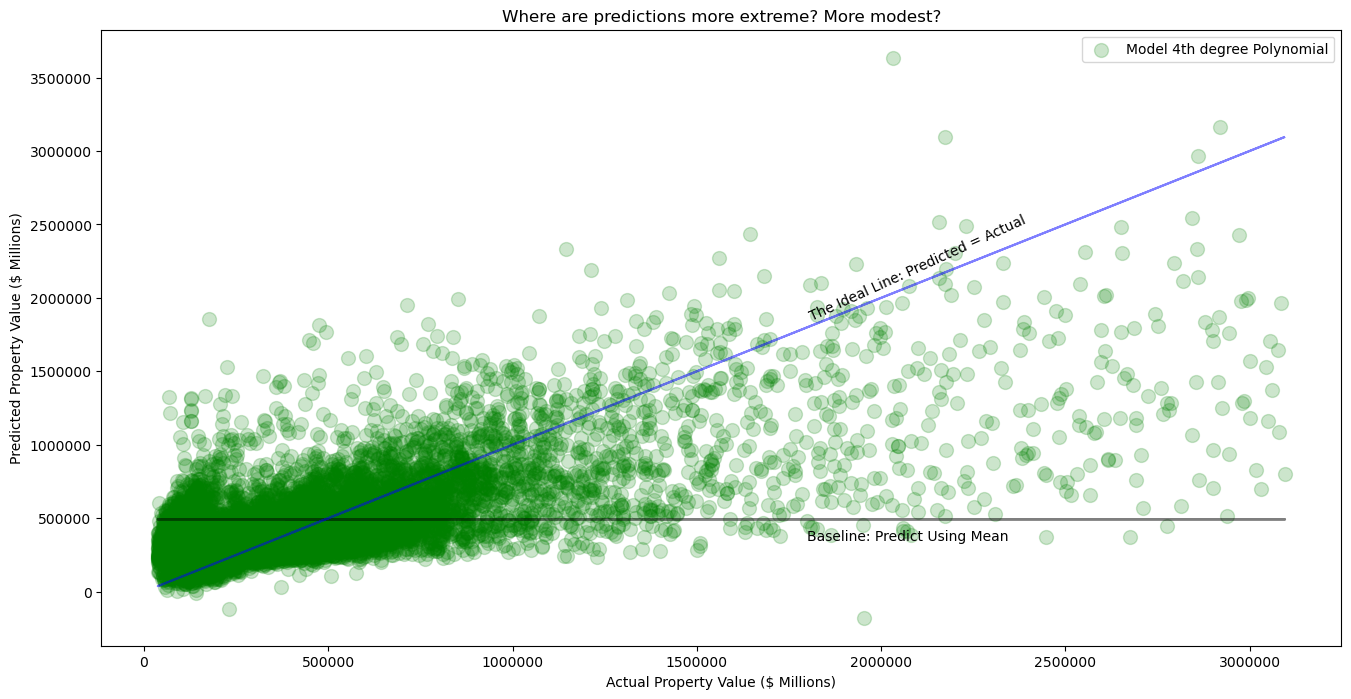

In [ ]:
w.plot_predicted_vs_actual(X_train_rob, y_train, X_test_rob, y_test)